# Trying out keras and tensorflow

In [40]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import glob


## Loading dataset

### Training dataset

In [41]:
dirImage = 'chest_xray_pneumonia/selected_dataset/'

filenames_train = []
filenames_train += glob.glob(dirImage+"training/*.jpg")

train_images = []
for file in filenames_train:
    img = np.asarray(cv.imread(file, 0))
    train_images.append(img)

train_images = np.asarray(train_images)

train_labels = []
with open(dirImage+'training/training_labels.txt', 'r') as rd:
    for line in rd:
        train_labels.append(int(line))
train_labels = np.asarray(train_labels, dtype=np.uint8)
print('Training images: ', train_images.shape)
print('Training labels: ', len(train_labels))

Training images:  (3747, 688, 1024)
Training labels:  3747


Image: 


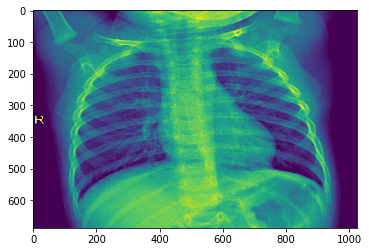

Label: 
1


In [42]:
i = np.random.randint(0, len(train_images))

print('Image: ')
plt.imshow(train_images[i])
plt.show()

print('Label: ')
print(train_labels[i])

In [43]:
dirImage = 'chest_xray_pneumonia/selected_dataset/'

filenames_val = []
filenames_val += glob.glob(dirImage+"validation/*.jpg")

val_images = []
for file in filenames_val:
    img = np.asarray(cv.imread(file, 0))
    val_images.append(img)

val_images = np.asarray(val_images)

val_labels = []
with open(dirImage+'validation/validation_labels.txt', 'r') as rd:
    for line in rd:
        val_labels.append(int(line))
val_labels = np.asarray(val_labels, dtype=np.uint8)
print('Validation images: ', val_images.shape)
print('Validation labels: ', len(val_labels))

Validation images:  (13, 688, 1024)
Validation labels:  13


Image: 


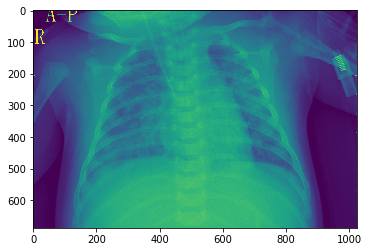

Label: 
1


In [44]:
i = np.random.randint(0, len(val_images))

print('Image: ')
plt.imshow(val_images[i])
plt.show()

print('Label: ')
print(val_labels[i])

In [45]:
dirImage = 'chest_xray_pneumonia/selected_dataset/'

filenames_test = []
filenames_test += glob.glob(dirImage+"testing/*.jpg")

test_images = []
for file in filenames_test:
    img = np.asarray(cv.imread(file, 0))
    test_images.append(img)

test_images = np.asarray(test_images)

test_labels = []
with open(dirImage+'testing/testing_labels.txt', 'r') as rd:
    for line in rd:
        test_labels.append(int(line))
test_labels = np.asarray(test_labels, dtype=np.uint8)
print('Testing images: ', test_images.shape)
print('Testing labels: ', len(test_labels))

Testing images:  (444, 688, 1024)
Testing labels:  444


Image: 


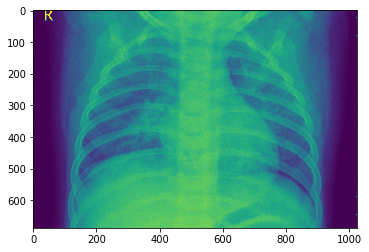

Label: 
1


In [46]:
i = np.random.randint(0, len(test_images))

print('Image: ')
plt.imshow(test_images[i])
plt.show()

print('Label: ')
print(test_labels[i])

## Scaling images

In [47]:
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

## Setting up model

In [48]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(688, 1024)),
#     keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     keras.layers.Dense(10, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(train_images, train_labels, epochs=5)

# model.evaluate(val_images, val_labels, verbose=2)

# model.evaluate(test_images, test_labels, verbose=2)

### Preferred height and width setup

In [67]:
preferred_height = 688 # need to change with the height dimension of each selected images
preferred_width = 1024 # need to change with the width dimension of each selected images
n_d=1
n_c=2
n_epoch=3 # number of epochs, we might wanna start with smaller values 

### Performance Logger

In [68]:
class Logger(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.accuracy = []

    def on_epoch_end(self, batch, logs={}):
        self.accuracy.append(logs.get('acc'))
logger = Logger()

### CNN

In [69]:
model = keras.Sequential([
    keras.layers.Conv2D(2, (5,5), activation='relu', 
                        input_shape=(preferred_height, preferred_width, n_d)), 
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(4, (5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(n_c, activation='softmax')
])
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(688, 1024)),
#     keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     keras.layers.Dense(n_c, activation='softmax')
# ])

In [70]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
train_images = train_images.reshape(train_images.shape[0], preferred_height, preferred_width, n_d)
val_images = val_images.reshape(val_images.shape[0], preferred_height, preferred_width, n_d)
test_images = test_images.reshape(test_images.shape[0], preferred_height, preferred_width, n_d)

### Shuffler

In [72]:
def shuffler(x, y):
    r_list = np.random.permutation(np.arange(x.shape[0]))
#     print(x.shape[0])
#     print(r_list)
    return x[r_list], y[r_list]

train_images, train_labels = shuffler(train_images, train_labels)

### Training

In [73]:
model.fit(train_images, train_labels, epochs=n_epoch, 
          validation_data=(val_images, val_labels), 
          callbacks=[logger])

Train on 3747 samples, validate on 13 samples
Epoch 1/3
3747/3747 [==============================] - 679s 181ms/sample - loss: 0.6261 - acc: 0.6723 - val_loss: 0.9477 - val_acc: 0.3846
Epoch 2/3
3747/3747 [==============================] - 680s 181ms/sample - loss: 0.5218 - acc: 0.7486 - val_loss: 1.1271 - val_acc: 0.4615
Epoch 3/3
3747/3747 [==============================] - 665s 178ms/sample - loss: 0.3856 - acc: 0.8231 - val_loss: 1.0373 - val_acc: 0.3846


### Test

In [74]:
result = model.evaluate(test_images, test_labels, verbose=0)
print('Accuracy: %s%s'%(result[1]*100, '%'))

Accuracy: 37.387385964393616%


### Visualization (Training)

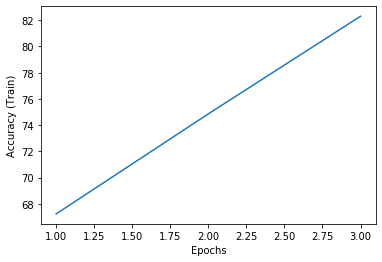

In [75]:
plt.plot(range(1,int(n_epoch+1)), [v*100 for v in logger.accuracy])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (Train)')
plt.show()